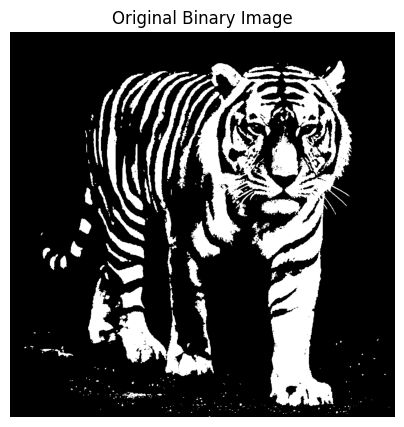

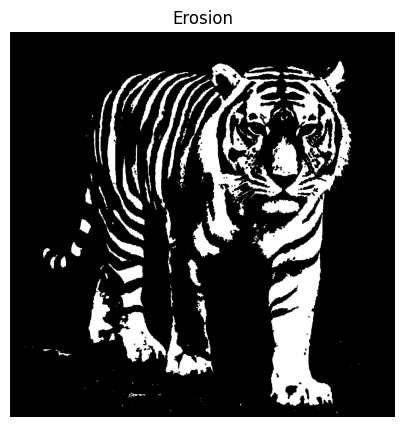

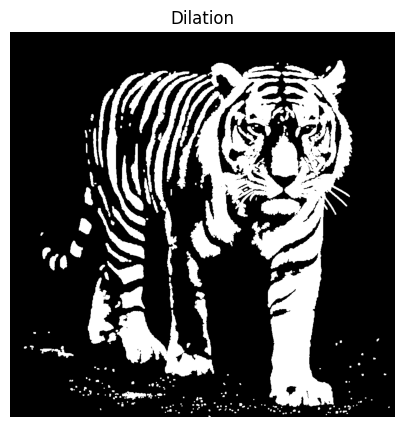

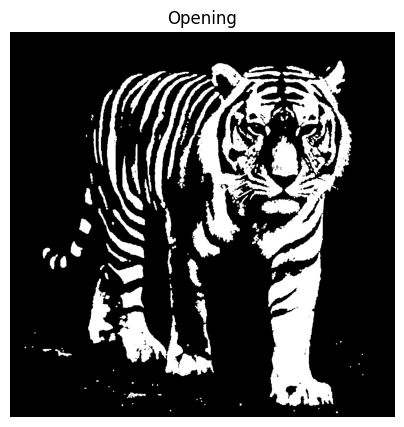

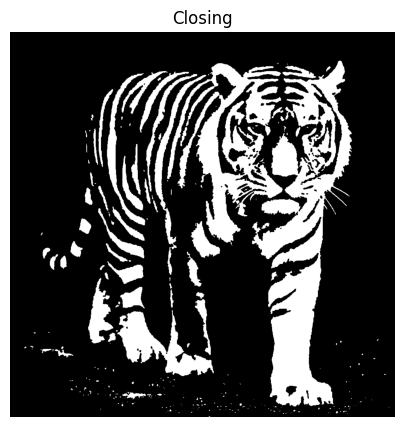

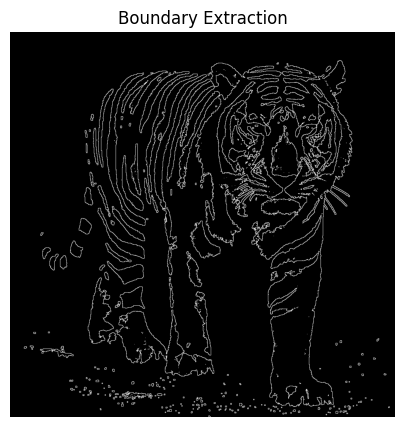

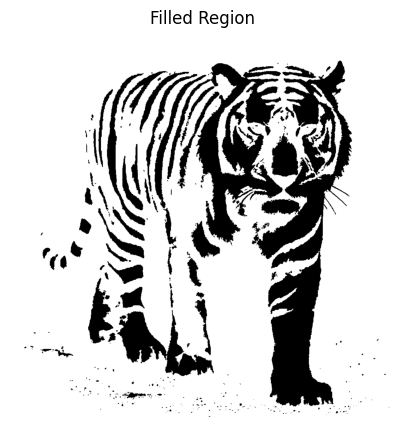

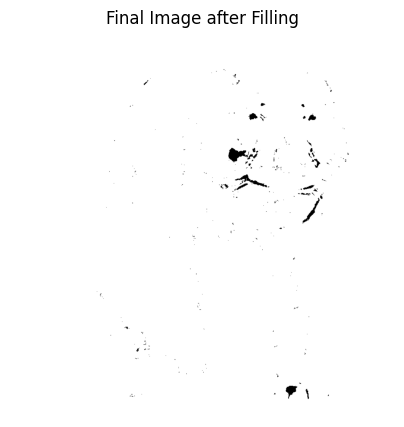

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Utility function to display images
def show_image(title, img, cmap='gray'):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

# Load a binary image (or threshold a grayscale one)
img = cv2.imread('images/binary.png', cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
show_image("Original Binary Image", binary)

# Structuring element (3x3 square)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# (a) Erosion and Dilation
eroded = cv2.erode(binary, kernel, iterations=1)
dilated = cv2.dilate(binary, kernel, iterations=1)

show_image("Erosion", eroded)
show_image("Dilation", dilated)

# (b) Opening and Closing
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

show_image("Opening", opened)
show_image("Closing", closed)

# (c) Boundary Extraction: Boundary = Dilation - Original
boundary = cv2.dilate(binary, kernel) - binary
show_image("Boundary Extraction", boundary)

# (d) Region Filling (Morphological approach)
def region_filling(binary_img, seed_point, kernel):
    # Invert image: object = 0, background = 255
    inv = cv2.bitwise_not(binary_img)
    
    # Create seed image
    filled = np.zeros_like(binary_img)
    filled[seed_point] = 255

    prev = np.zeros_like(binary_img)
    while True:
        dilated = cv2.dilate(filled, kernel)
        filled = cv2.bitwise_and(dilated, inv)
        if np.array_equal(filled, prev):
            break
        prev = filled.copy()

    result = filled | binary_img
    return filled, result

# Seed point (y, x) coordinate for filling
seed_point = (250, 250)  # adjust as needed for your image
filled_region, final_img = region_filling(binary, seed_point, kernel)

show_image("Filled Region", filled_region)
show_image("Final Image after Filling", final_img)
